# Data Preprocessing

In [60]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re as regex
import re
import numpy as np
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zhouxinyi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
datafile =  'try_data.csv'
data = pd.read_csv(datafile,encoding="ISO-8859-1")
# data

In [62]:
class TwitterData_Initialize():
    data = []
    processed_data = []
    wordlist = []

    is_testing = False
    
    def initialize(self, csv_file):
       

        
        self.data = pd.read_csv('try_data.csv', header=0)
        self.data = self.data[['date','text']]

        self.processed_data = self.data
        self.wordlist = []


In [63]:
data = TwitterData_Initialize()
data.initialize('try_data.csv')
data.processed_data.head(5)

,date,text
0,2/24/19 17:30,Show them what crazy dreams can do. #justdoitp...
1,7/7/19 16:56,This team wins. Everyone wins. Victory is when...
2,7/4/19 1:24,White American get more upset about Nike and m...
3,6/1/19 13:59,DonâÃÃ´t change your dream. Change the worl...
4,5/2/19 6:21,"Nike did it again, I love this pic.twitter.com..."


In [64]:
class TwitterCleanup:
    def iterate(self):
        for cleanup in [self.remove_urls,
                               self.remove_usernames,
                               self.remove_special_charaters,
                               self.remove_numbers]:
            yield cleanup

    @staticmethod
    def remove_regex(t, regex_t):
        t.loc[:, "text"].replace(regex_t, "", inplace=True)
        return t

    def remove_urls(self, tweets):
        return TwitterCleanup.remove_regex(tweets, regex.compile(r"http.?://[^\s]+[\s]?"))


    def remove_special_charaters(self, tweets):  # it unrolls the hashtags to normal words
        for remove in map(lambda r: regex.compile(regex.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#",',']):
            tweets.loc[:, "text"].replace(remove, "", inplace=True)
        return tweets

    def remove_usernames(self, tweets):
        return TwitterCleanup.remove_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

    def remove_numbers(self, tweets):
        return TwitterCleanup.remove_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))
    
    
    

In [65]:
class TwitterData_Cleansing(TwitterData_Initialize):
    def __init__(self, previous):
        self.processed_data = previous.processed_data
        
    def cleanup(self, cleanup):
        t = self.processed_data
        for method in cleanup.iterate():
            t = method(t)

        self.processed_data = t

In [66]:
data = TwitterData_Cleansing(data)
data.cleanup(TwitterCleanup())
data.processed_data.head(10)

,date,text
0,2/24/19 17:30,Show them what crazy dreams can do justdoitpic...
1,7/7/19 16:56,This team wins Everyone wins Victory is when w...
2,7/4/19 1:24,White American get more upset about Nike and m...
3,6/1/19 13:59,DonâÃÃ´t change your dream Change the world...
4,5/2/19 6:21,Nike did it again I love this pictwittercomUUa...
5,10/10/18 0:18,guys think itâÃÃ´s âÃÃºgayâÃÃ¹ to wea...
6,10/22/19 20:12,We not years old you not wearing my hoodies an...
7,10/10/18 16:14,Justin Gallegos a runner at Oregon with cerebr...
8,6/9/19 16:14,Crazy dreams take crazy effort career majors F...
9,6/27/19 18:37,year old me creating NikeID soccer boots on t...


In [68]:
data.processed_data['text'] = data.processed_data['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+',' ', x))
    

In [69]:
data.processed_data

,date,text
0,2/24/19 17:30,Show them what crazy dreams can do justdoitpic...
1,7/7/19 16:56,This team wins Everyone wins Victory is when w...
2,7/4/19 1:24,White American get more upset about Nike and m...
3,6/1/19 13:59,Don t change your dream Change the world justd...
4,5/2/19 6:21,Nike did it again I love this pictwittercomUUa...
...,...,...
667584,9/5/19 13:36,some believedmost went aside following Baalsfa...
667585,10/7/19 19:27,Attacking Nike the NBA the NFL Dem mayors But ...
667586,7/3/19 17:11,I don t think she was ever officially sponsore...
667587,1/29/19 21:02,Yes which means he was CEO during Trumps campa...


In [70]:
data.processed_data['text'] = data.processed_data['text'].astype(str)

In [71]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 
word_tokens = []





In [72]:
for index in data.processed_data.iloc[:,1]:
    word_tokens.append(word_tokenize(index))

print('done')



done


In [73]:
filtered_sentence = [] 

other_words = ['‚ä¶','ä¶.','x','addidas','+','ã','â','ãºgayâ','Ã','Ã´s â',]


for word in word_tokens:
    this_filtered_sentence = [w.lower() for w in word if not w.lower() in stop_words and not w.lower() in other_words] 
    filtered_sentence.append(this_filtered_sentence)


In [74]:

data.processed_data['filtered']=filtered_sentence

In [75]:
data.processed_data['combined_text'] =  data.processed_data['filtered'].apply(' '.join)

In [76]:
data.processed_data.head(10)

,date,text,filtered,combined_text
0,2/24/19 17:30,Show them what crazy dreams can do justdoitpic...,"[show, crazy, dreams, justdoitpictwittercomfox...",show crazy dreams justdoitpictwittercomfoxmvkbt
1,7/7/19 16:56,This team wins Everyone wins Victory is when w...,"[team, wins, everyone, wins, victory, win, cra...",team wins everyone wins victory win crazy just...
2,7/4/19 1:24,White American get more upset about Nike and m...,"[white, american, get, upset, nike, mermaids, ...",white american get upset nike mermaids concent...
3,6/1/19 13:59,Don t change your dream Change the world justd...,"[change, dream, change, world, justdoitpictwit...",change dream change world justdoitpictwitterco...
4,5/2/19 6:21,Nike did it again I love this pictwittercomUUa...,"[nike, love, pictwittercomuuawwosr]",nike love pictwittercomuuawwosr
5,10/10/18 0:18,guys think it s gay to wear black nail polish ...,"[guys, think, gay, wear, black, nail, polish, ...",guys think gay wear black nail polish eyeshado...
6,10/22/19 20:12,We not years old you not wearing my hoodies an...,"[years, old, wearing, hoodies, keeping, em, ni...",years old wearing hoodies keeping em nike hood...
7,10/10/18 16:14,Justin Gallegos a runner at Oregon with cerebr...,"[justin, gallegos, runner, oregon, cerebral, p...",justin gallegos runner oregon cerebral palsy t...
8,6/9/19 16:14,Crazy dreams take crazy effort career majors F...,"[crazy, dreams, take, crazy, effort, career, m...",crazy dreams take crazy effort career majors f...
9,6/27/19 18:37,year old me creating NikeID soccer boots on t...,"[year, old, creating, nikeid, soccer, boots, n...",year old creating nikeid soccer boots nike web...


# Bigram Analysis

In [77]:
word_2_tokens = []
import nltk
for index in data.processed_data.iloc[:,3]:
    word_2_tokens.append(nltk.bigrams(word_tokenize(index)))


In [78]:
data.processed_data['two_word_filtered'] = word_2_tokens

In [79]:
data.processed_data

,date,text,filtered,combined_text,two_word_filtered
0,2/24/19 17:30,Show them what crazy dreams can do justdoitpic...,"[show, crazy, dreams, justdoitpictwittercomfox...",show crazy dreams justdoitpictwittercomfoxmvkbt,<generator object bigrams at 0x2160560c0>
1,7/7/19 16:56,This team wins Everyone wins Victory is when w...,"[team, wins, everyone, wins, victory, win, cra...",team wins everyone wins victory win crazy just...,<generator object bigrams at 0x2160561b0>
2,7/4/19 1:24,White American get more upset about Nike and m...,"[white, american, get, upset, nike, mermaids, ...",white american get upset nike mermaids concent...,<generator object bigrams at 0x216056228>
3,6/1/19 13:59,Don t change your dream Change the world justd...,"[change, dream, change, world, justdoitpictwit...",change dream change world justdoitpictwitterco...,<generator object bigrams at 0x2160562a0>
4,5/2/19 6:21,Nike did it again I love this pictwittercomUUa...,"[nike, love, pictwittercomuuawwosr]",nike love pictwittercomuuawwosr,<generator object bigrams at 0x216056318>
...,...,...,...,...,...
667584,9/5/19 13:36,some believedmost went aside following Baalsfa...,"[believedmost, went, aside, following, baalsfa...",believedmost went aside following baalsfalse g...,<generator object bigrams at 0x25a4309a8>
667585,10/7/19 19:27,Attacking Nike the NBA the NFL Dem mayors But ...,"[attacking, nike, nba, nfl, dem, mayors, obama...",attacking nike nba nfl dem mayors obama hillar...,<generator object bigrams at 0x25a430a20>
667586,7/3/19 17:11,I don t think she was ever officially sponsore...,"[think, ever, officially, sponsored, nike, alw...",think ever officially sponsored nike always we...,<generator object bigrams at 0x25a430a98>
667587,1/29/19 21:02,Yes which means he was CEO during Trumps campa...,"[yes, means, ceo, trumps, campaign, election, ...",yes means ceo trumps campaign election muslim ...,<generator object bigrams at 0x25a430b10>


In [80]:
from collections import Counter
class TwitterData_Wordlist():
    def __init__(self, previous):
        self.processed_data = data.processed_data
        
    whitelist = ["n't","not"]
    wordlist = []
        
    def build_wordlist(self, max_occurences=500,whitelist=None):
     
        words = Counter()
        for idx in self.processed_data.index:
            words.update(self.processed_data.loc[idx, "two_word_filtered"])


        word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common()],
                                     "occurrences": [v for k, v in words.most_common()]},
                               columns=["word", "occurrences"])

        word_df.to_csv("wordlist.csv", index_label="idx")

In [81]:
data = TwitterData_Wordlist(data)
data.build_wordlist()

In [82]:
words = pd.read_csv("wordlist.csv")
words[:20]

,idx,word,occurrences
0,0,"('nike', 'air')",101479
1,1,"('air', 'max')",63389
2,2,"('free', 'shipping')",36987
3,3,"('release', 'date')",24020
4,4,"('air', 'force')",20944
5,5,"('shipping', 'buy')",14959
6,6,"('style', 'code')",12751
7,7,"('use', 'code')",11068
8,8,"('nike', 'react')",10735
9,9,"('available', 'purchase')",10500


# Product Analysis

## Air Jordan

In [83]:
df_jordan = data.processed_data[data.processed_data['combined_text'].str.contains('air jordan')]
df_jordan

,date,text,filtered,combined_text,two_word_filtered
343,9/28/19 1:11,Nike Air Jordan pictwittercomymcCoW,"[nike, air, jordan, pictwittercomymccow]",nike air jordan pictwittercomymccow,<generator object bigrams at 0x216b06750>
420,8/13/19 14:07,After Nike released their Air Jordans in the N...,"[nike, released, air, jordans, nba, banned, mi...",nike released air jordans nba banned michael j...,<generator object bigrams at 0x216b22c78>
853,6/20/19 18:54,Adidas Yeezy vs Nike Air Jordan pictwittercomq...,"[adidas, yeezy, vs, nike, air, jordan, pictwit...",adidas yeezy vs nike air jordan pictwittercomq...,<generator object bigrams at 0x216bd9e58>
866,2/24/19 17:08,Bred Air Jordans with Nike Air on the heel re...,"[bred, air, jordans, nike, air, heel, return, ...",bred air jordans nike air heel return may many...,<generator object bigrams at 0x216be64f8>
1017,4/21/19 16:34,x Giveaway Free pair of Nike Air Jordan OG Hig...,"[giveaway, free, pair, nike, air, jordan, og, ...",giveaway free pair nike air jordan og high cri...,<generator object bigrams at 0x216c1ede0>
...,...,...,...,...,...
666771,3/28/19 13:09,Travis Scott x Nike Air Jordan Reverse Swoosh ...,"[travis, scott, nike, air, jordan, reverse, sw...",travis scott nike air jordan reverse swoosh mo...,<generator object bigrams at 0x25a2def48>
667121,10/18/18 17:22,The Air Jordan XXXIII Future Flight is now ava...,"[air, jordan, xxxiii, future, flight, availabl...",air jordan xxxiii future flight available nike...,<generator object bigrams at 0x25a371930>
667204,11/15/18 7:21,u sent me a fake pair of Air Jordan shadowEven...,"[u, sent, fake, pair, air, jordan, shadoweven,...",u sent fake pair air jordan shadoweven blind t...,<generator object bigrams at 0x25a39a1b0>
667254,10/25/19 11:44,We getting Nike to make our kits Tears in my e...,"[getting, nike, make, kits, tears, eyes, need,...",getting nike make kits tears eyes need air jor...,<generator object bigrams at 0x25a3a99a8>


In [84]:
df_jordan = df_jordan[['combined_text','two_word_filtered' ]]
df_jordan

,combined_text,two_word_filtered
343,nike air jordan pictwittercomymccow,<generator object bigrams at 0x216b06750>
420,nike released air jordans nba banned michael j...,<generator object bigrams at 0x216b22c78>
853,adidas yeezy vs nike air jordan pictwittercomq...,<generator object bigrams at 0x216bd9e58>
866,bred air jordans nike air heel return may many...,<generator object bigrams at 0x216be64f8>
1017,giveaway free pair nike air jordan og high cri...,<generator object bigrams at 0x216c1ede0>
...,...,...
666771,travis scott nike air jordan reverse swoosh mo...,<generator object bigrams at 0x25a2def48>
667121,air jordan xxxiii future flight available nike...,<generator object bigrams at 0x25a371930>
667204,u sent fake pair air jordan shadoweven blind t...,<generator object bigrams at 0x25a39a1b0>
667254,getting nike make kits tears eyes need air jor...,<generator object bigrams at 0x25a3a99a8>


In [85]:
sentiment= SentimentIntensityAnalyzer()

df_jordan['polarity_value']="Default"
df_jordan['neg']=0.0
df_jordan['pos']=0.0
df_jordan['neu']=0.0
df_jordan['compound']=0.0
for index,row in df_jordan.iterrows():
    senti = sentiment.polarity_scores(row['combined_text'])
    df_jordan.set_value(index,'polarity_value',senti)
    df_jordan.set_value(index,'neg',senti['neg'])
    df_jordan.set_value(index,'pos',senti['pos'])
    df_jordan.set_value(index,'neu',senti['neu'])
    df_jordan.set_value(index,'compound',senti['compound'])
df_jordan.head()

/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
343,nike air jordan pictwittercomymccow,<generator object bigrams at 0x216b06750>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
420,nike released air jordans nba banned michael j...,<generator object bigrams at 0x216b22c78>,"{'neg': 0.168, 'neu': 0.769, 'pos': 0.063, 'co...",0.168,0.063,0.769,-0.4588
853,adidas yeezy vs nike air jordan pictwittercomq...,<generator object bigrams at 0x216bd9e58>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
866,bred air jordans nike air heel return may many...,<generator object bigrams at 0x216be64f8>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1017,giveaway free pair nike air jordan og high cri...,<generator object bigrams at 0x216c1ede0>,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.000,0.228,0.772,0.7964


### 1. Positive Emotion

In [86]:
df_jordan_positive = df_jordan[df_jordan['compound']>0]
df_jordan_positive

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
1017,giveaway free pair nike air jordan og high cri...,<generator object bigrams at 0x216c1ede0>,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.000,0.228,0.772,0.7964
1340,grandson gets beat running insist friend pair ...,<generator object bigrams at 0x216caaa98>,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.000,0.158,0.842,0.4939
1673,salutes mj air jordan inspired nike lebron sheesh,<generator object bigrams at 0x216d30c00>,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.000,0.314,0.686,0.4939
1845,giveaway nike air jordan gym red month copy en...,<generator object bigrams at 0x216d76f48>,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.000,0.386,0.614,0.8316
2151,pj tucker started new year wearing ff psg air ...,<generator object bigrams at 0x216e02408>,"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.000,0.135,0.865,0.4215
...,...,...,...,...,...,...,...
665391,talk fctm inspired gave students aday project ...,<generator object bigrams at 0x25a0ab2a0>,"{'neg': 0.038, 'neu': 0.431, 'pos': 0.531, 'co...",0.038,0.531,0.431,0.9601
665782,air jordan mid yellow toe goes live nike ca mi...,<generator object bigrams at 0x25a142048>,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.000,0.246,0.754,0.7579
666019,air jordan retro chinese new year drops nike c...,<generator object bigrams at 0x25a1b3318>,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.000,0.202,0.798,0.5106
666237,nike internationalist black toe inspiration ai...,<generator object bigrams at 0x25a204c78>,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.000,0.221,0.779,0.5267


In [87]:
df_jordan_positive.to_csv(r'df_jordan_pos.csv')

In [88]:
rawText = ''
for x in list(df_jordan_positive['combined_text']):
    rawText += x


### Word Cloud Using Bigrams

In [89]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
import re
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()

rawText = rawText.replace("'", "")
 
tokens = nltk.word_tokenize(rawText)
text = nltk.Text(tokens)

text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict = {}
 
list_Length = len(scoredList)
for i in range(listLength):
    word_dict['_'.join(scoredList[i][0])] = (scoredList[i][1])

    


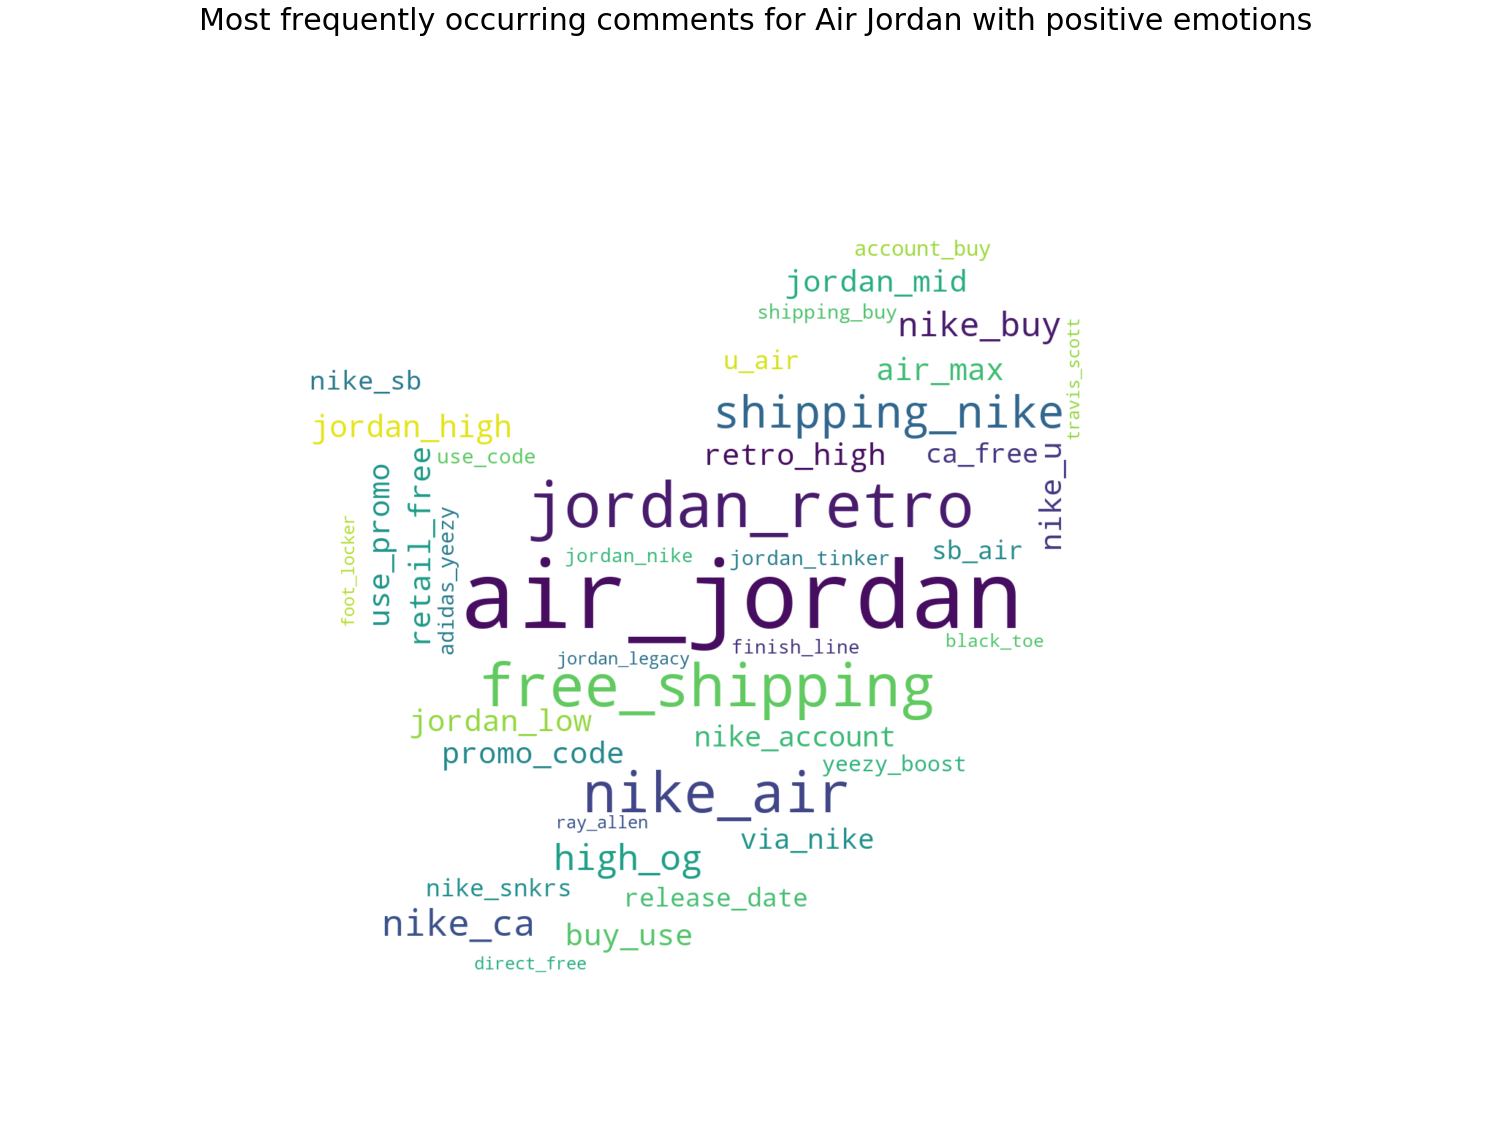

In [92]:
WC_height = 500
WC_width = 1000
WC_max_words = 40
mask = np.array(Image.open('air_jordan.jpg'))
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,mask = mask, background_color = "white")
 
wordCloud.generate_from_frequencies(word_dict)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Jordan with positive emotions',fontsize= 30)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file("WordCloud_Bigrams_frequent_words.png")


### 2. Negative Emotion

In [93]:
df_jordan_negative = df_jordan[df_jordan['compound']<0]
df_jordan_negative

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
420,nike released air jordans nba banned michael j...,<generator object bigrams at 0x216b22c78>,"{'neg': 0.168, 'neu': 0.769, 'pos': 0.063, 'co...",0.168,0.063,0.769,-0.4588
1528,pj tucker arrives brooklyn wearing air jordan ...,<generator object bigrams at 0x216cfb5e8>,"{'neg': 0.185, 'neu': 0.694, 'pos': 0.121, 'co...",0.185,0.121,0.694,-0.2732
1962,recognize nike lebron air jordan pe worn pictw...,<generator object bigrams at 0x216dae840>,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",0.239,0.000,0.761,-0.2960
2456,early look nike sb air jordan low qs mj logo t...,<generator object bigrams at 0x216e7e7c8>,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.149,0.000,0.851,-0.2732
3271,ep supreme crash tee black nike travis scott a...,<generator object bigrams at 0x216fde318>,"{'neg': 0.224, 'neu': 0.588, 'pos': 0.188, 'co...",0.224,0.188,0.588,-0.0516
...,...,...,...,...,...,...,...
662313,dropping minutes via nike snkrs nike sb parra ...,<generator object bigrams at 0x259ba8de0>,"{'neg': 0.122, 'neu': 0.793, 'pos': 0.085, 'co...",0.122,0.085,0.793,-0.0516
664366,nike air jordan sb light bone release tomorrow...,<generator object bigrams at 0x259f081b0>,"{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'comp...",0.077,0.000,0.923,-0.2732
664424,havek account im already thinking buying gshoc...,<generator object bigrams at 0x259f14d68>,"{'neg': 0.062, 'neu': 0.938, 'pos': 0.0, 'comp...",0.062,0.000,0.938,-0.0516
667204,u sent fake pair air jordan shadoweven blind t...,<generator object bigrams at 0x25a39a1b0>,"{'neg': 0.368, 'neu': 0.537, 'pos': 0.095, 'co...",0.368,0.095,0.537,-0.7650


In [94]:
rawText2 = ''
for x in list(df_jordan_negative['combined_text']):
    rawText2 += x


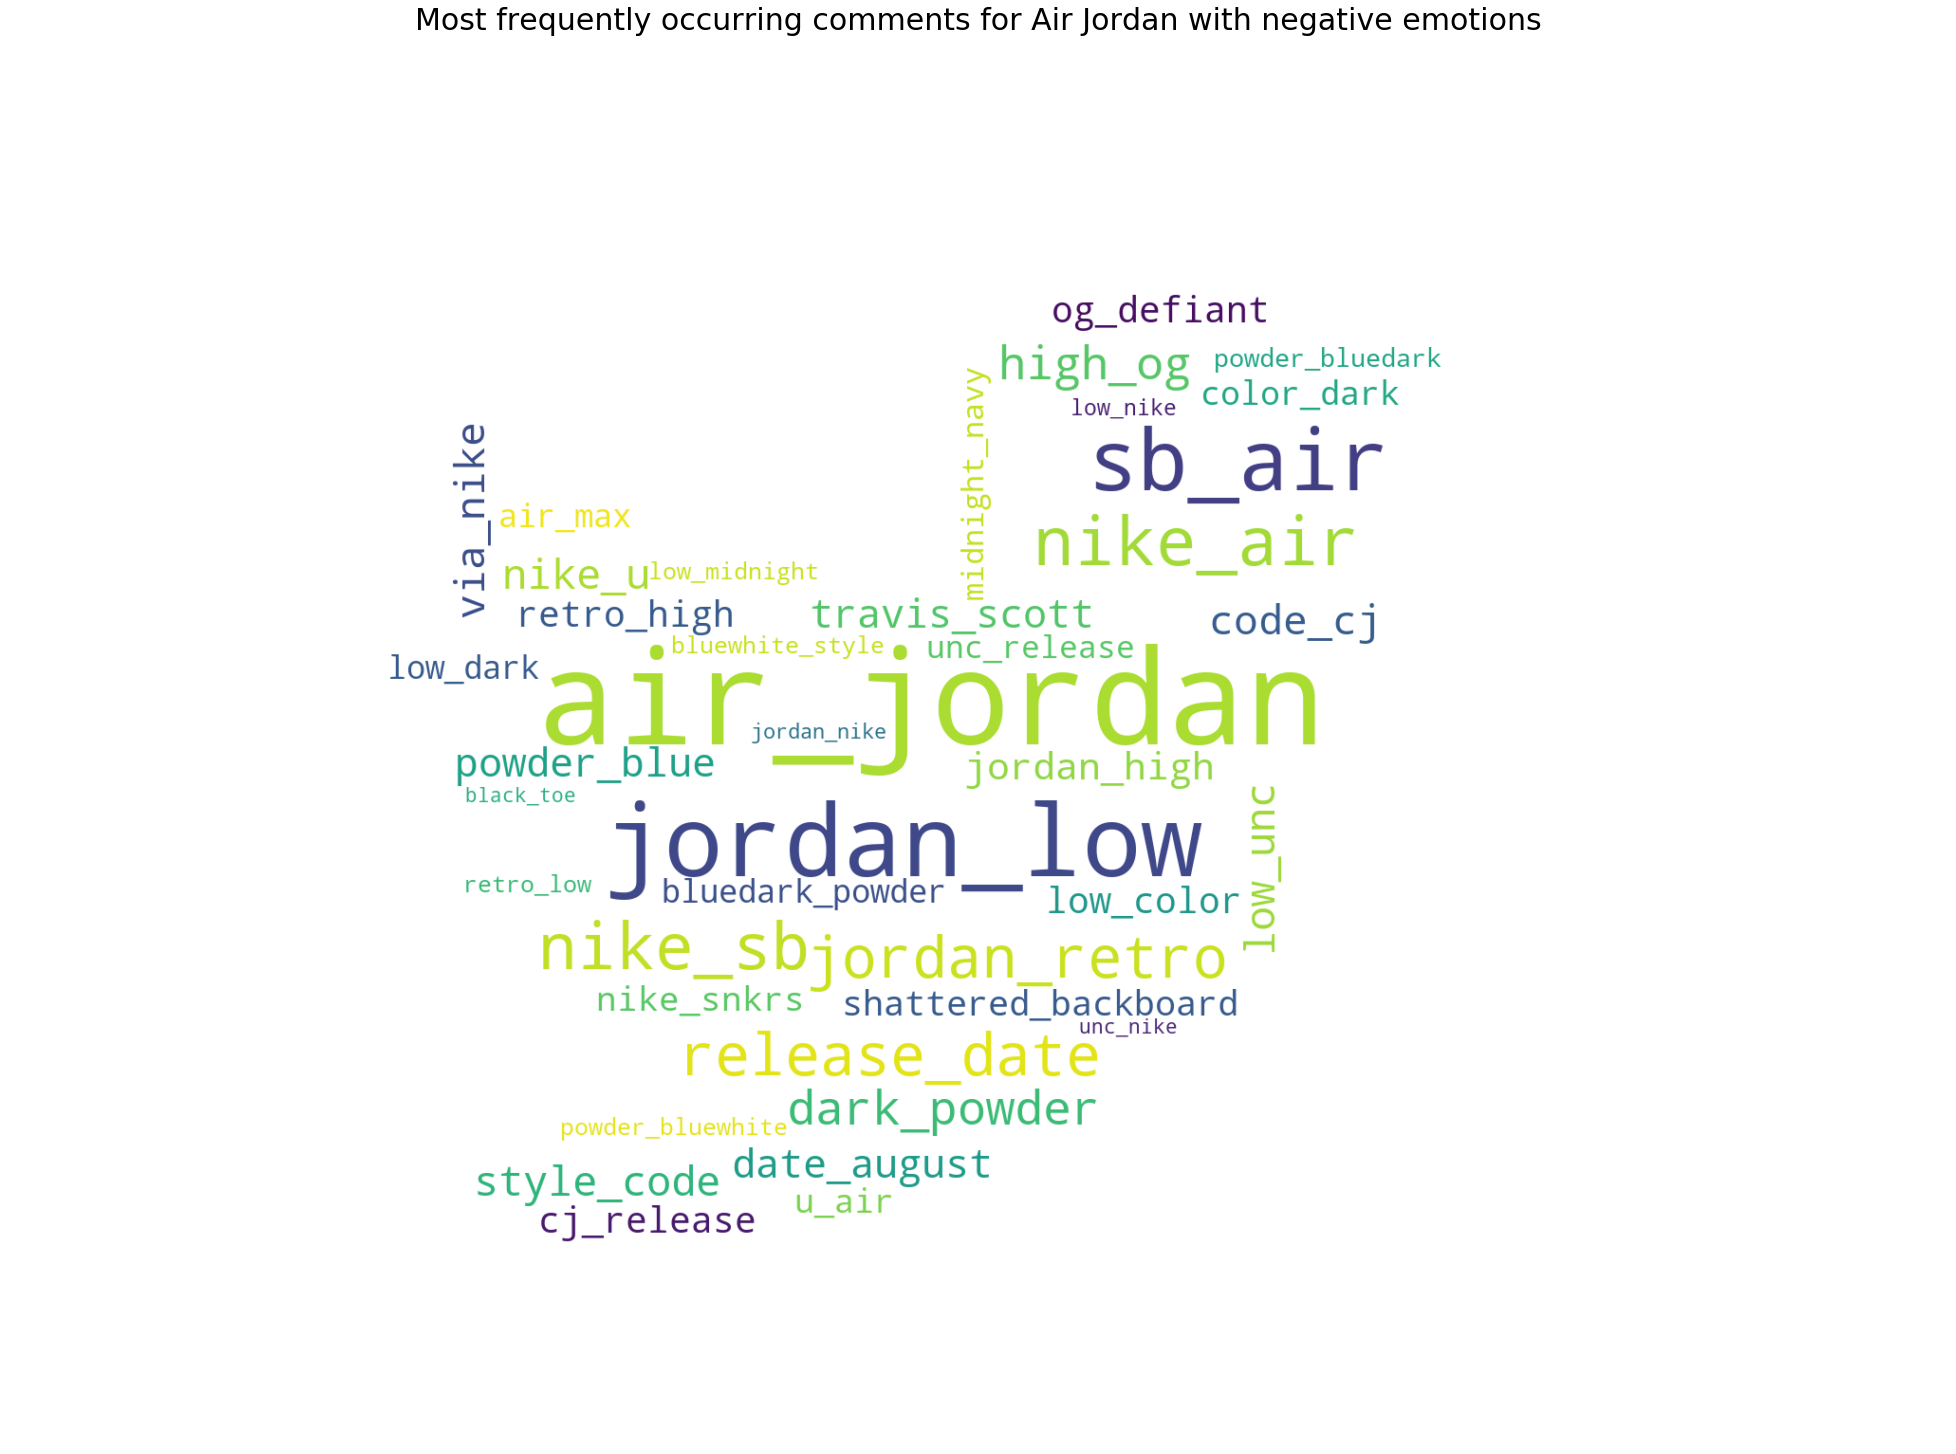

In [95]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()


rawText2 = rawText2.replace("'", "")
 
tokens = nltk.word_tokenize(rawText2)
text = nltk.Text(tokens)
 
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict2 = {}
 
list_Length = len(scoredList)
for i in range(list_Length):
    word_dict2['_'.join(scoredList[i][0])] = scoredList[i][1]
    
mask = np.array(Image.open('air_jordan.jpg'))
width = 1000,
height = 500,
WC_max_words = 40
background_color = 'white'

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color = background_color,
                     mask=mask)
 
wordCloud.generate_from_frequencies(word_dict2)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Jordan with negative emotions',fontsize= 30)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 


In [96]:
datafile = 'df_jordan_pos.csv'
df_jordan_positive= pd.read_csv(datafile,encoding="ISO-8859-1")

In [ ]:
!pip install jieba
!pip install pyldavis

In [97]:
import jieba

In [98]:
def word_cut(mytext):
    return " ".join(jieba.cut(mytext))
df_jordan_positive["new_text"] = df_jordan_positive.combined_text.apply(word_cut)
df_jordan_positive.new_text.head()


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/xr/qgl0xqdj4tl4cfthf5d1wzy80000gn/T/jieba.cache
Loading model cost 1.198 seconds.
Prefix dict has been built succesfully.


0    giveaway   free   pair   nike   air   jordan  ...
1    grandson   gets   beat   running   insist   fr...
2    salutes   mj   air   jordan   inspired   nike ...
3    giveaway   nike   air   jordan   gym   red   m...
4    pj   tucker   started   new   year   wearing  ...
Name: new_text, dtype: object

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [100]:
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df_jordan_positive.new_text)

In [101]:
from sklearn.decomposition import LatentDirichletAllocation

In [102]:
n_topics = 4
lda = LatentDirichletAllocation( n_components=4,max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [103]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [104]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [105]:
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
live et ca snkrs colourway release ad retro high og code finish grey line price fearless foot champs eastbay buy
Topic #1:
free shipping buy retro sizes retail use code promo mid new select account available low direct ca size se sale
Topic #2:
retro max release adidas yeezy og high boost date sneakers airjordan travis scott best kicks sneaker low pair like size
Topic #3:
black sb jordans new retro available pair low supreme white grey brand shoes og red original cool high colorway releasing



In [106]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.245188 -0.187973       1        1  30.476719
3      0.085770 -0.045770       2        1  24.848358
2      0.260190 -0.051553       3        1  23.490303
0     -0.100771  0.285296       4        1  21.184620, topic_info=    Category        Freq      Term       Total  loglift  logprob
170  Default  847.000000      free  847.000000  30.0000  30.0000
459  Default  795.000000  shipping  795.000000  29.0000  29.0000
49   Default  587.000000       buy  587.000000  28.0000  28.0000
468  Default  363.000000     sizes  363.000000  27.0000  27.0000
417  Default  343.000000    retail  343.000000  26.0000  26.0000
..       ...         ...       ...         ...      ...      ...
74    Topic4  107.141411      code  380.643507   0.2842  -3.9933
519   Topic4   65.106479    tinker  131.235694   0.8509  -4.4914
419   Topic4  125.567808     retro  996.111961  -0.5191  -3.8346
104   Topic4   72.998394      date  185.989200   0.6166  -4.3770
49    Topic4   73.983712       buy  587.974353  -0.5209  -4.3636

[214 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1         1  0.994170          account
4         4  0.990968               ad
6         3  0.994249           adidas
7         4  0.982591           afewam
8         2  0.069260        airjordan
...     ...       ...              ...
560       4  0.981178  whiteuniversity
562       3  0.985911              win
578       3  0.993305            yeezy
581       4  0.991886            youre
582       1  0.951484            youth

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

# Air max

In [108]:
df_max = data.processed_data[data.processed_data['combined_text'].str.contains('air max')]
df_max

,date,text,filtered,combined_text,two_word_filtered
46,6/7/19 17:12,Nike Air Max pictwittercomsXrtGvSk,"[nike, air, max, pictwittercomsxrtgvsk]",nike air max pictwittercomsxrtgvsk,<generator object bigrams at 0x216a98750>
76,9/9/19 15:00,Nike Air Max pictwittercomzkMVOPgzA,"[nike, air, max, pictwittercomzkmvopgza]",nike air max pictwittercomzkmvopgza,<generator object bigrams at 0x216aa35e8>
82,6/21/19 21:55,Nike Air Max pictwittercombIdkojEdk,"[nike, air, max, pictwittercombidkojedk]",nike air max pictwittercombidkojedk,<generator object bigrams at 0x216aa38b8>
84,7/25/19 21:01,Nike Air Max pictwittercomKzlcyMB,"[nike, air, max, pictwittercomkzlcymb]",nike air max pictwittercomkzlcymb,<generator object bigrams at 0x216aa39a8>
91,9/13/19 17:01,Nike Air Max pictwittercomLcFHu,"[nike, air, max, pictwittercomlcfhu]",nike air max pictwittercomlcfhu,<generator object bigrams at 0x216aa3cf0>
...,...,...,...,...,...
667469,7/5/19 17:29,If youre a fan of Nike like me any Air Maxs ar...,"[youre, fan, nike, like, air, maxs, die, curre...",youre fan nike like air maxs die current favor...,<generator object bigrams at 0x25a407228>
667492,1/28/19 19:37,Outraged Muslims are demanding Nike recall an ...,"[outraged, muslims, demanding, nike, recall, o...",outraged muslims demanding nike recall offensi...,<generator object bigrams at 0x25a407cf0>
667512,6/1/19 13:32,Nike Air Max swipa air max is live pictwitterc...,"[nike, air, max, swipa, air, max, live, pictwi...",nike air max swipa air max live pictwittercomq...,<generator object bigrams at 0x25a4136d8>
667546,6/4/19 6:59,NEW Nike Air Max Proto Max Grey Volt LIVE at F...,"[new, nike, air, max, proto, max, grey, volt, ...",new nike air max proto max grey volt live foot...,<generator object bigrams at 0x25a421750>


In [109]:
df_max = df_max[['combined_text','two_word_filtered' ]]
df_max
sentiment= SentimentIntensityAnalyzer()

df_max['polarity_value']="Default"
df_max['neg']=0.0
df_max['pos']=0.0
df_max['neu']=0.0
df_max['compound']=0.0
for index,row in df_max.iterrows():
    senti = sentiment.polarity_scores(row['combined_text'])
    df_max.set_value(index,'polarity_value',senti)
    df_max.set_value(index,'neg',senti['neg'])
    df_max.set_value(index,'pos',senti['pos'])
    df_max.set_value(index,'neu',senti['neu'])
    df_max.set_value(index,'compound',senti['compound'])
df_max.head()

/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/zhouxinyi/anaconda3/

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
46,nike air max pictwittercomsxrtgvsk,<generator object bigrams at 0x216a98750>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
76,nike air max pictwittercomzkmvopgza,<generator object bigrams at 0x216aa35e8>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
82,nike air max pictwittercombidkojedk,<generator object bigrams at 0x216aa38b8>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
84,nike air max pictwittercomkzlcymb,<generator object bigrams at 0x216aa39a8>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
91,nike air max pictwittercomlcfhu,<generator object bigrams at 0x216aa3cf0>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


### 1. Positive Emotion

In [110]:
df_max_positive = df_max[df_max['compound']>0]
df_max_positive

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
111,saying air max well alrighty,<generator object bigrams at 0x216aab6d8>,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.344,0.656,0.2732
287,giveaway win white nike air max retweet follow...,<generator object bigrams at 0x216aebc00>,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.000,0.297,0.703,0.8225
345,priceless moment surprised chaney high schools...,<generator object bigrams at 0x216b06840>,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...",0.000,0.095,0.905,0.2263
380,womens nike air max ff ready drop month pictwi...,<generator object bigrams at 0x216b12930>,"{'neg': 0.157, 'neu': 0.448, 'pos': 0.396, 'co...",0.157,0.396,0.448,0.4939
514,happy late air max day gibson firebird vii nik...,<generator object bigrams at 0x216b4ca20>,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",0.000,0.236,0.764,0.5719
...,...,...,...,...,...,...,...
667274,happy finally came lovin nike air max mars lan...,<generator object bigrams at 0x25a3b4390>,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.000,0.291,0.709,0.5719
667414,sale nike react element nike air max price buy...,<generator object bigrams at 0x25a3ea750>,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.000,0.154,0.846,0.3724
667469,youre fan nike like air maxs die current favor...,<generator object bigrams at 0x25a407228>,"{'neg': 0.2, 'neu': 0.41, 'pos': 0.39, 'compou...",0.200,0.390,0.410,0.4019
667546,new nike air max proto max grey volt live foot...,<generator object bigrams at 0x25a421750>,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.000,0.085,0.915,0.0516


In [114]:
rawText3 = ''
for x in list(df_max_positive['combined_text']):
    rawText3 += x


<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<ipython-input-116-4d0d3afbf558>:22: DeprecationWarning: invalid escape sequence \-
  text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]


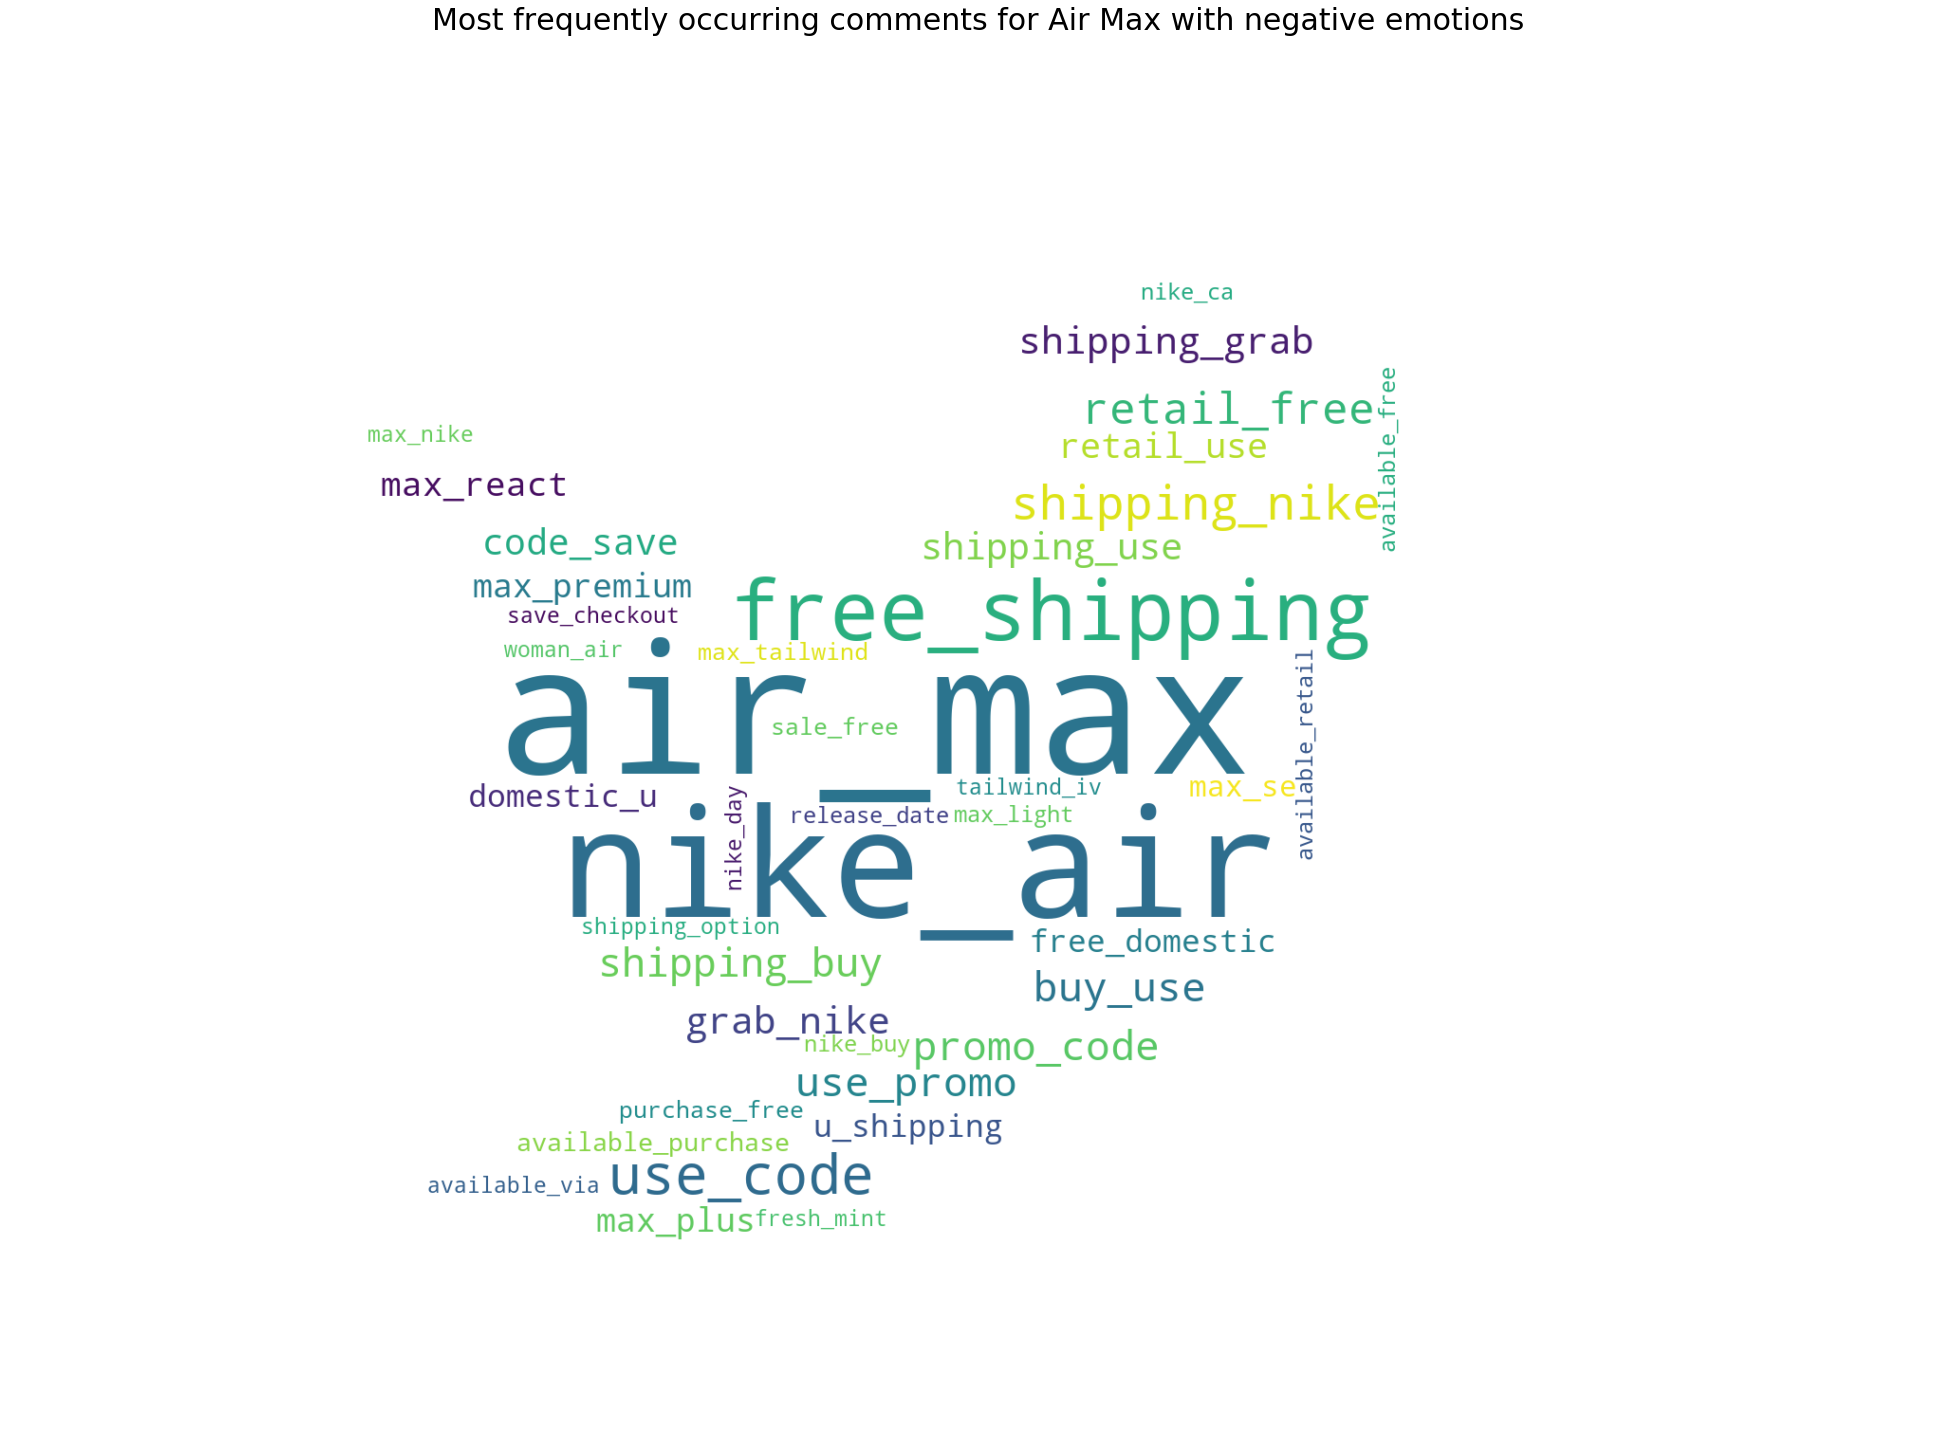

In [116]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()


rawText3 = rawText3.replace("'", "")
 
tokens = nltk.word_tokenize(rawText3)
text = nltk.Text(tokens)
 
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict3 = {}
 
list_Length = len(scoredList)
for i in range(list_Length):
    word_dict3['_'.join(scoredList[i][0])] = scoredList[i][1]
    
mask = np.array(Image.open('air_jordan.jpg'))
width = 1000,
height = 500,
WC_max_words = 40
background_color = 'white'

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color = background_color,
                     mask=mask)
 
wordCloud.generate_from_frequencies(word_dict3)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Max with negative emotions',fontsize= 30)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 


### 2. Negative Emotion

In [117]:
df_max_negative = df_max[df_max['compound']<0]
df_max_negative

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
311,custom thieves air maxs created via bespoke pr...,<generator object bigrams at 0x216afa7c8>,"{'neg': 0.223, 'neu': 0.541, 'pos': 0.236, 'co...",0.223,0.236,0.541,-0.2023
880,bts airport rm obey invader la hoodie nike air...,<generator object bigrams at 0x216be6b88>,"{'neg': 0.146, 'neu': 0.731, 'pos': 0.123, 'co...",0.146,0.123,0.731,-0.2732
1008,sean wotherspoon broke oneofone air max sample...,<generator object bigrams at 0x216c1e9a8>,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0.219,0.000,0.781,-0.4215
2666,nike going crazy air max se vintage pictwitter...,<generator object bigrams at 0x216ed3d68>,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",0.255,0.000,0.745,-0.3400
2775,lebron goes nike lebron low air max trainer ho...,<generator object bigrams at 0x216f0a2a0>,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.189,0.000,0.811,-0.2732
...,...,...,...,...,...,...,...
665927,thousands people calling nike recall air max s...,<generator object bigrams at 0x25a18a660>,"{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'comp...",0.176,0.000,0.824,-0.4588
666153,thoughts pulled betsyrossflag air max usa snea...,<generator object bigrams at 0x25a1e8408>,"{'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'comp...",0.143,0.000,0.857,-0.1280
666187,muslims demand nike pull air max shelves offen...,<generator object bigrams at 0x25a1f5480>,"{'neg': 0.391, 'neu': 0.609, 'pos': 0.0, 'comp...",0.391,0.000,0.609,-0.5423
667358,actually wan na cop hard air maxs shit,<generator object bigrams at 0x25a3ccc00>,"{'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...",0.455,0.000,0.545,-0.6124


In [118]:
rawText4 = ''
for x in list(df_max_negative['combined_text']):
    rawText4 += x


<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<ipython-input-119-62ab9121bc8d>:22: DeprecationWarning: invalid escape sequence \-
  text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]


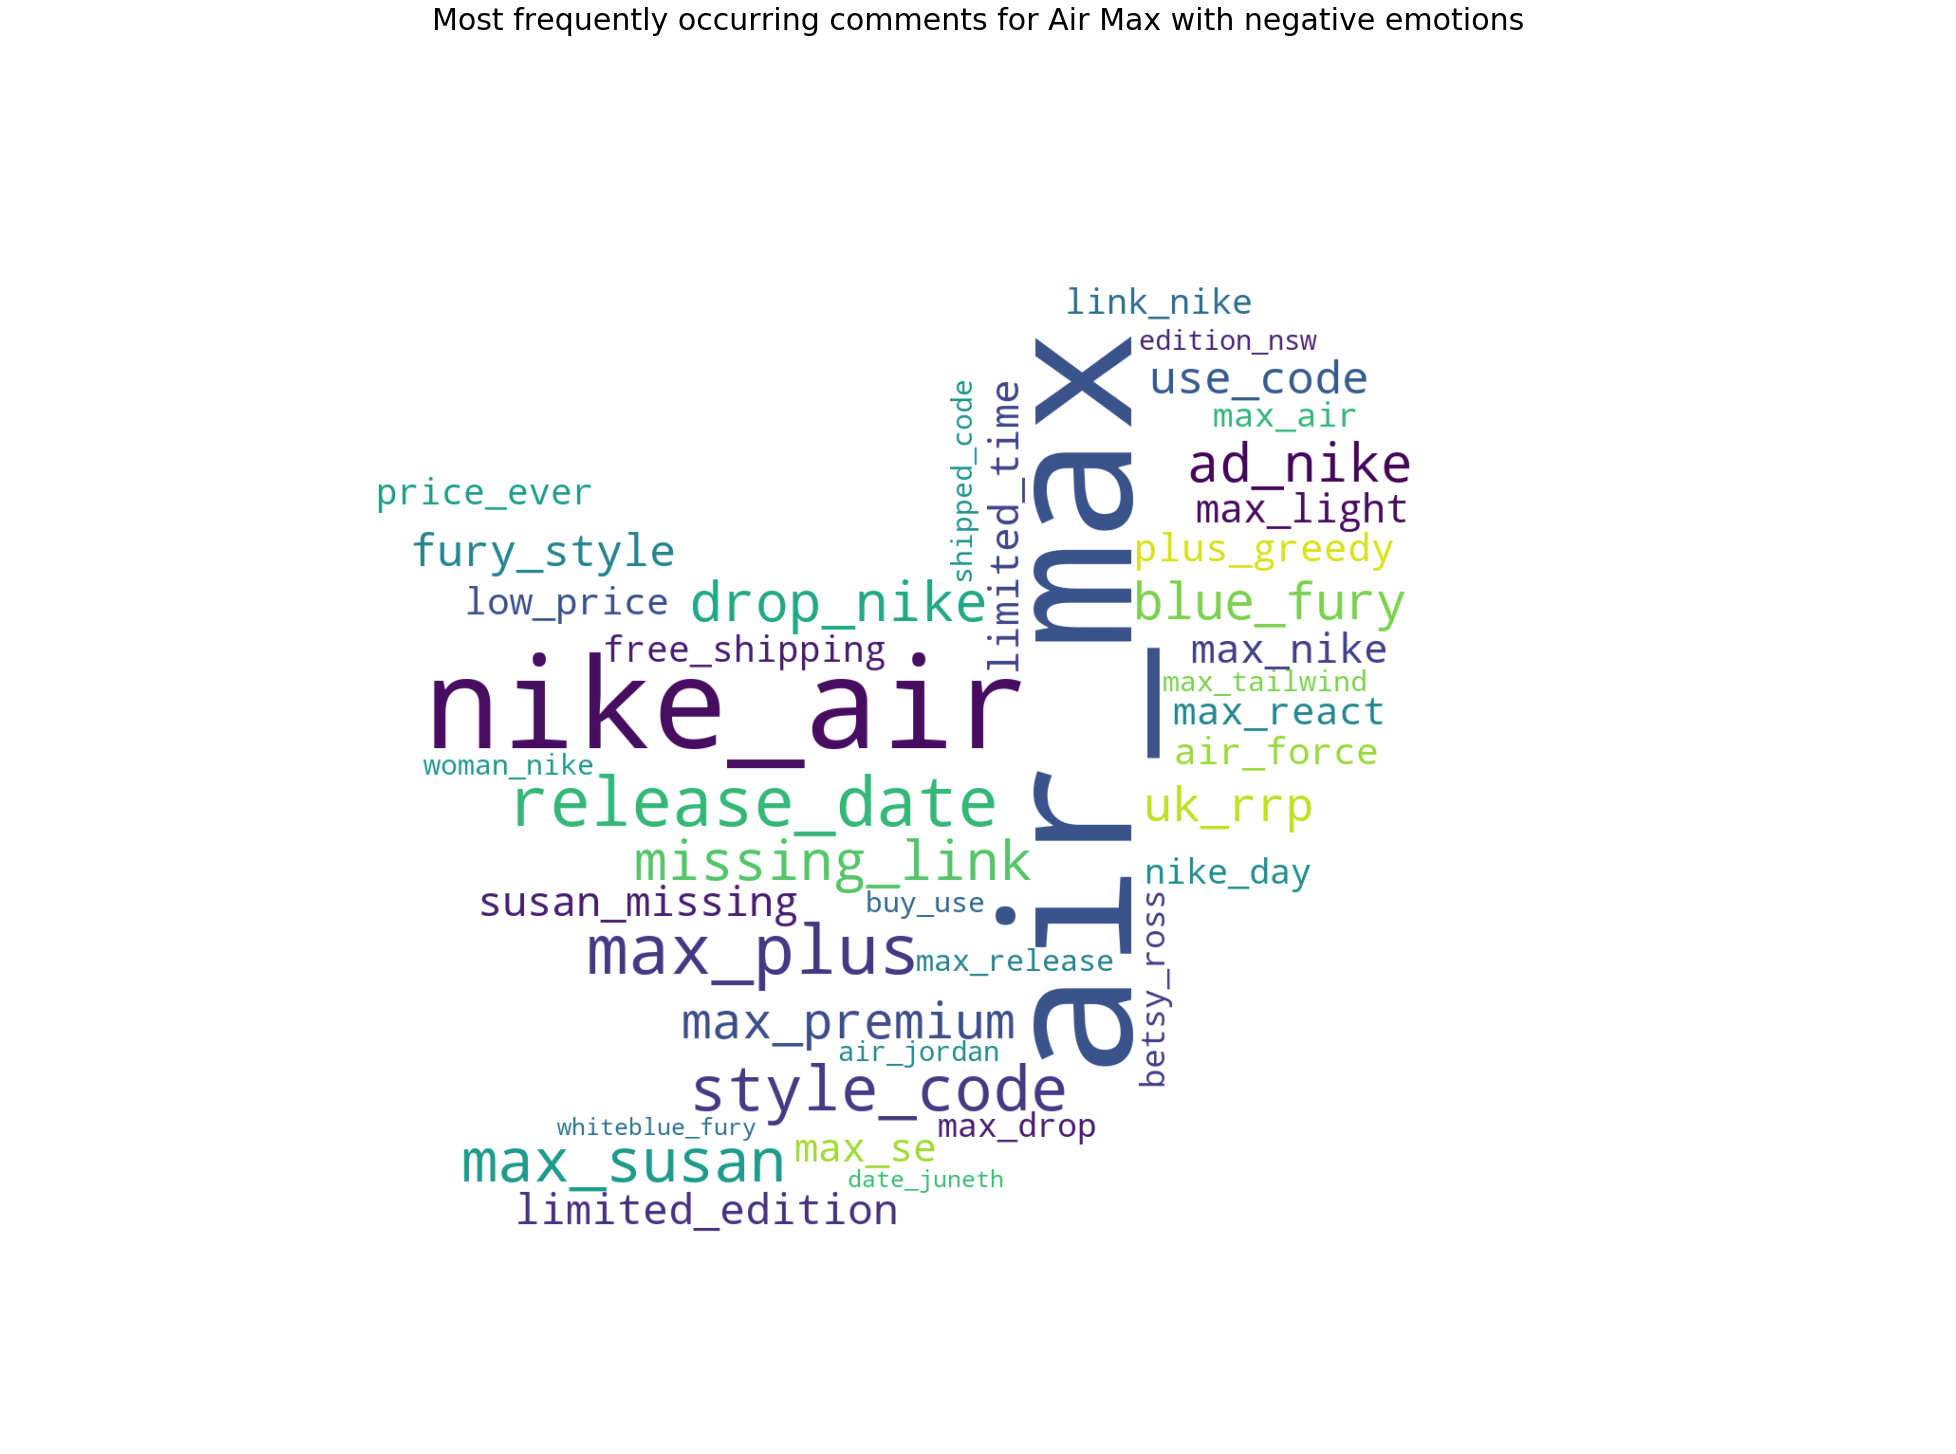

In [119]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()


rawText4 = rawText4.replace("'", "")
 
tokens = nltk.word_tokenize(rawText4)
text = nltk.Text(tokens)
 
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict4 = {}
 
list_Length = len(scoredList)
for i in range(list_Length):
    word_dict4['_'.join(scoredList[i][0])] = scoredList[i][1]
    
mask = np.array(Image.open('air_jordan.jpg'))
width = 1000,
height = 500,
WC_max_words = 40
background_color = 'white'

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color = background_color,
                     mask=mask)
 
wordCloud.generate_from_frequencies(word_dict4)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Max with negative emotions',fontsize= 30)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 


# Air Force

In [120]:
df_force = data.processed_data[data.processed_data['combined_text'].str.contains('air force')]
df_force

,date,text,filtered,combined_text,two_word_filtered
10,6/2/19 6:23,year olds nowadays nike air forces converse a...,"[year, olds, nowadays, nike, air, forces, conv...",year olds nowadays nike air forces converse ad...,<generator object bigrams at 0x2160565e8>
56,8/27/19 17:36,Nike Air Force pictwittercomNPeYeKnJW,"[nike, air, force, pictwittercomnpeyeknjw]",nike air force pictwittercomnpeyeknjw,<generator object bigrams at 0x216a98c00>
64,9/29/19 15:02,Nike Air Force Reflective pictwittercomPSobWaoAr,"[nike, air, force, reflective, pictwittercomps...",nike air force reflective pictwittercompsobwaoar,<generator object bigrams at 0x216a98048>
67,6/24/19 15:19,Nike Air Force x Tupac Shakur pictwittercomRzx...,"[nike, air, force, tupac, shakur, pictwitterco...",nike air force tupac shakur pictwittercomrzxjd...,<generator object bigrams at 0x216aa31b0>
79,8/13/19 17:53,Nike Air Force Low pictwittercomgGzcIykL,"[nike, air, force, low, pictwittercomggzciykl]",nike air force low pictwittercomggzciykl,<generator object bigrams at 0x216aa3750>
...,...,...,...,...,...
667007,12/21/18 12:54,Ad LIVE via Mr Porter UK AColdWall x Nike Air ...,"[ad, live, via, mr, porter, uk, acoldwall, nik...",ad live via mr porter uk acoldwall nike air fo...,<generator object bigrams at 0x25a34b228>
667330,12/8/18 17:18,son los nike air force mid,"[son, los, nike, air, force, mid]",son los nike air force mid,<generator object bigrams at 0x25a3c2e58>
667443,11/26/18 2:18,So you mean to tell me you guys let your class...,"[mean, tell, guys, let, classic, shoes, air, f...",mean tell guys let classic shoes air force one...,<generator object bigrams at 0x25a3f5570>
667495,12/12/18 21:44,I want that Nike Air Force phone case but it d...,"[want, nike, air, force, phone, case, come, pl...",want nike air force phone case come plus sizes,<generator object bigrams at 0x25a407e58>


In [121]:
df_force = df_force[['combined_text','two_word_filtered' ]]
df_force

,combined_text,two_word_filtered
10,year olds nowadays nike air forces converse ad...,<generator object bigrams at 0x2160565e8>
56,nike air force pictwittercomnpeyeknjw,<generator object bigrams at 0x216a98c00>
64,nike air force reflective pictwittercompsobwaoar,<generator object bigrams at 0x216a98048>
67,nike air force tupac shakur pictwittercomrzxjd...,<generator object bigrams at 0x216aa31b0>
79,nike air force low pictwittercomggzciykl,<generator object bigrams at 0x216aa3750>
...,...,...
667007,ad live via mr porter uk acoldwall nike air fo...,<generator object bigrams at 0x25a34b228>
667330,son los nike air force mid,<generator object bigrams at 0x25a3c2e58>
667443,mean tell guys let classic shoes air force one...,<generator object bigrams at 0x25a3f5570>
667495,want nike air force phone case come plus sizes,<generator object bigrams at 0x25a407e58>


In [122]:
sentiment= SentimentIntensityAnalyzer()

df_force['polarity_value']="Default"
df_force['neg']=0.0
df_force['pos']=0.0
df_force['neu']=0.0
df_force['compound']=0.0
for index,row in df_force.iterrows():
    senti = sentiment.polarity_scores(row['combined_text'])
    df_force.set_value(index,'polarity_value',senti)
    df_force.set_value(index,'neg',senti['neg'])
    df_force.set_value(index,'pos',senti['pos'])
    df_force.set_value(index,'neu',senti['neu'])
    df_force.set_value(index,'compound',senti['compound'])
df_force.head()

/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zhouxinyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
10,year olds nowadays nike air forces converse ad...,<generator object bigrams at 0x2160565e8>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
56,nike air force pictwittercomnpeyeknjw,<generator object bigrams at 0x216a98c00>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
64,nike air force reflective pictwittercompsobwaoar,<generator object bigrams at 0x216a98048>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
67,nike air force tupac shakur pictwittercomrzxjd...,<generator object bigrams at 0x216aa31b0>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
79,nike air force low pictwittercomggzciykl,<generator object bigrams at 0x216aa3750>,"{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...",0.344,0.0,0.656,-0.2732


### 1. Positive Emotion

In [123]:
df_force_positive = df_force[df_force['compound']>0]
df_force_positive

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
166,prove youre best repping best rt follow chance...,<generator object bigrams at 0x216ac11b0>,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...",0.000,0.505,0.495,0.9607
291,still giving away trapsoul air forces anyone l...,<generator object bigrams at 0x216aebde0>,"{'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'comp...",0.000,0.509,0.491,0.9485
437,day today giving away pair travis scott nike a...,<generator object bigrams at 0x216b2f4f8>,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...",0.000,0.220,0.780,0.7351
456,nike air force celebrating includes confetti f...,<generator object bigrams at 0x216b2fde0>,"{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'comp...",0.000,0.458,0.542,0.8225
544,rt follow chance winning uki xbox elite contro...,<generator object bigrams at 0x216b598b8>,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.000,0.379,0.621,0.8750
...,...,...,...,...,...,...,...
666203,nike sf air force high court purple xd yaaas p...,<generator object bigrams at 0x25a1f5c00>,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.000,0.257,0.743,0.5859
666480,someone please stop buying nike air forces,<generator object bigrams at 0x25a2702a0>,"{'neg': 0.232, 'neu': 0.526, 'pos': 0.242, 'co...",0.232,0.242,0.526,0.0258
666672,easy checkout via notre emotionally unavailabl...,<generator object bigrams at 0x25a2b4f48>,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.225,0.775,0.4404
666853,nike air force plz dmtext question pictwitterc...,<generator object bigrams at 0x25a306750>,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.000,0.178,0.822,0.0772


In [124]:
df_force_positive.to_csv(r'df_force_pos.csv')

In [125]:
rawText5 = ''
for x in list(df_force_positive['combined_text']):
    rawText5 += x


<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<ipython-input-126-dbd2dcd60a3a>:22: DeprecationWarning: invalid escape sequence \-
  text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]


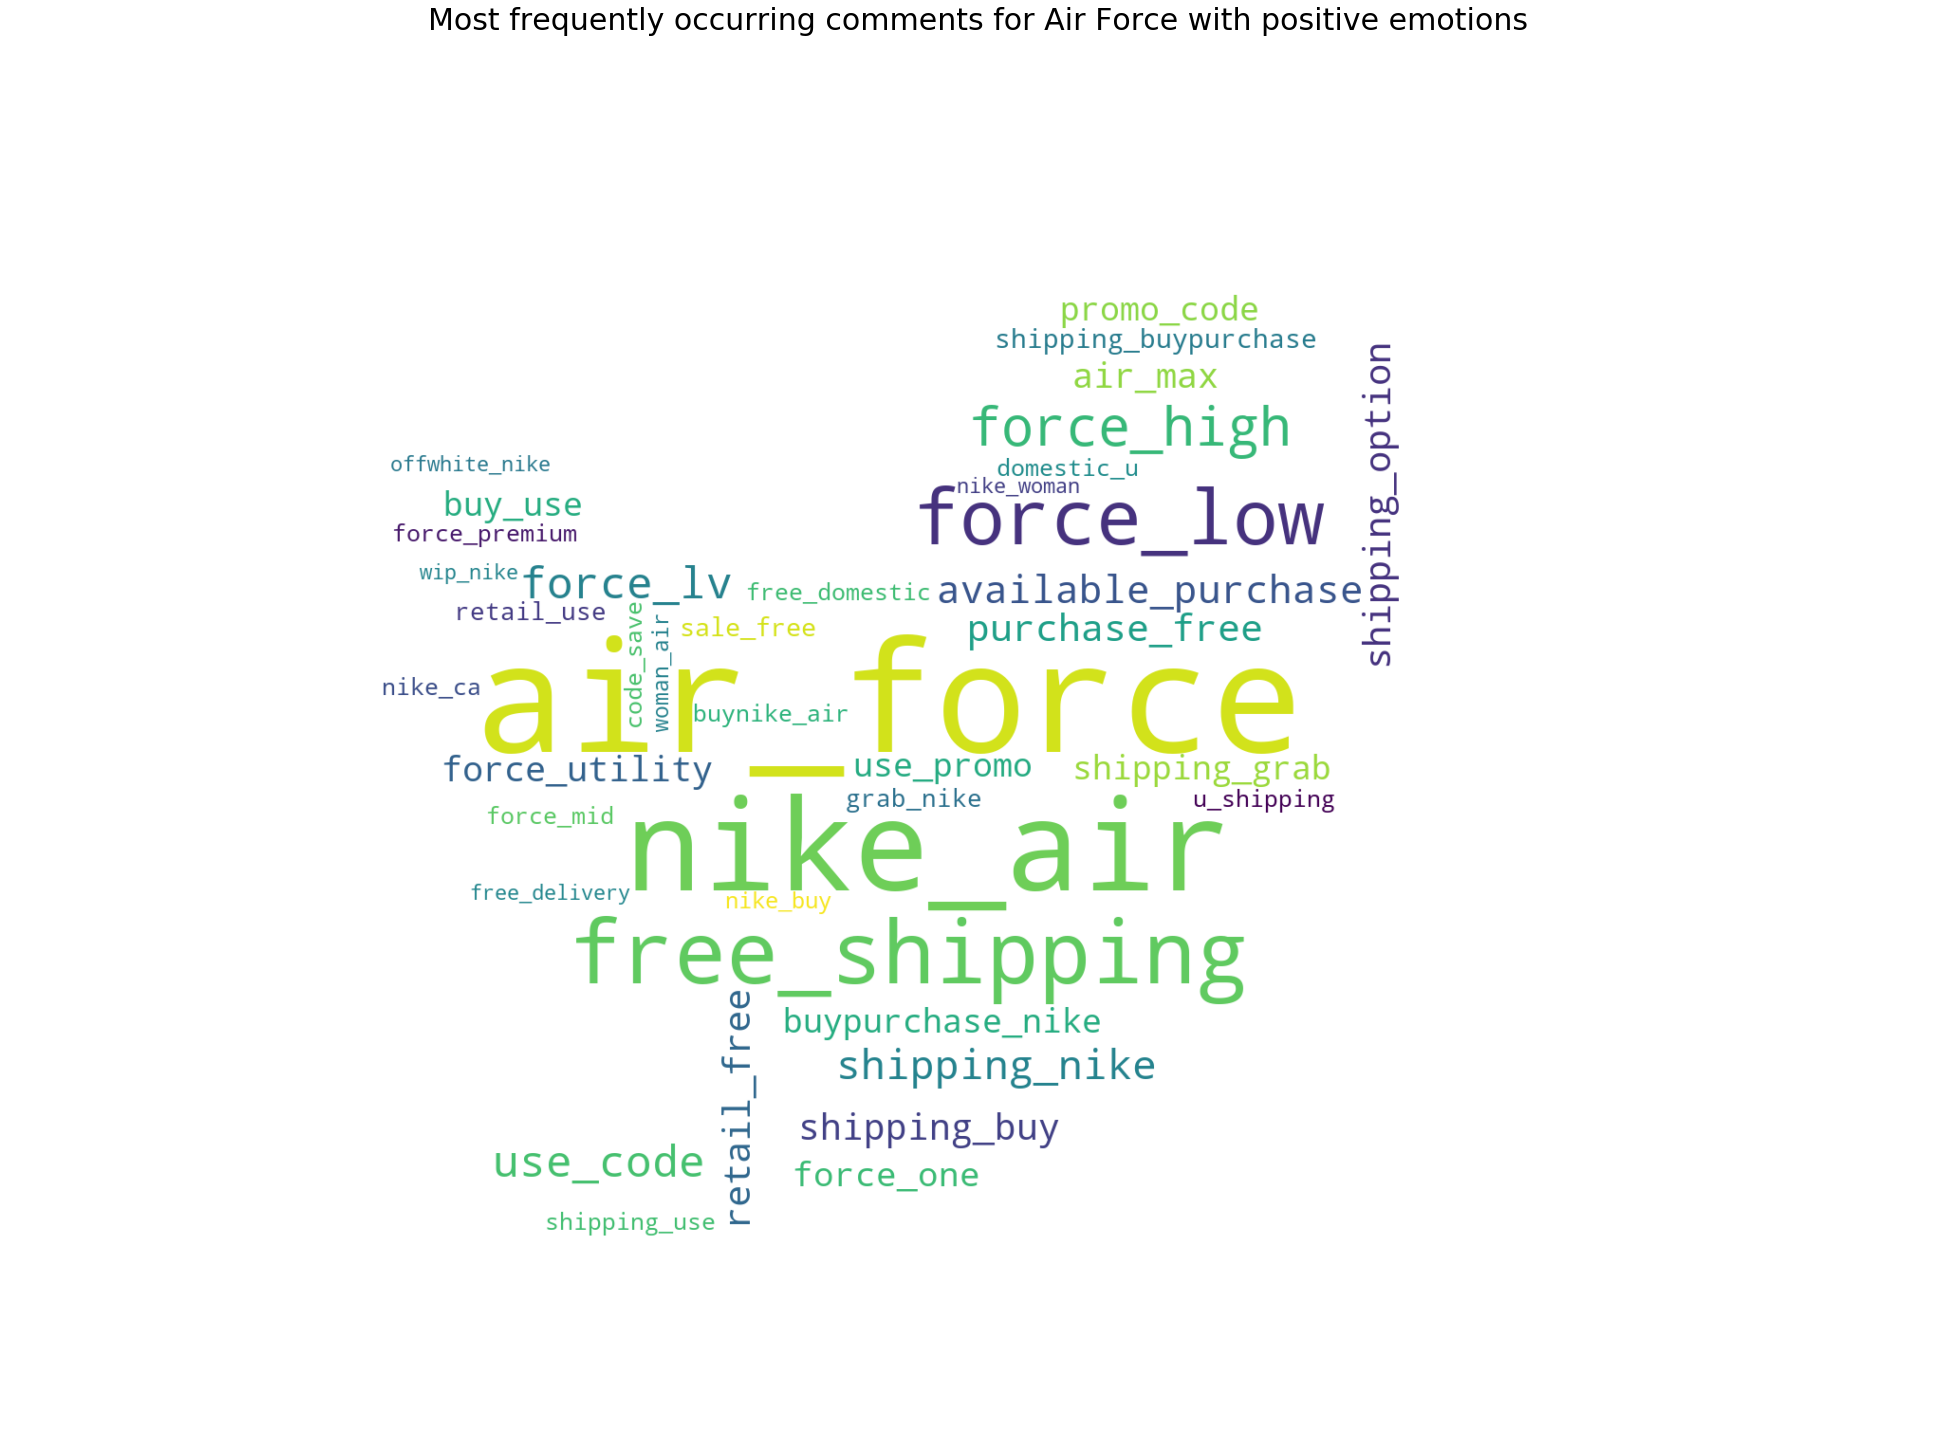

In [126]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()


rawText5 = rawText5.replace("'", "")
 
tokens = nltk.word_tokenize(rawText5)
text = nltk.Text(tokens)
 
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict5 = {}
 
list_Length = len(scoredList)
for i in range(list_Length):
    word_dict5['_'.join(scoredList[i][0])] = scoredList[i][1]
    
mask = np.array(Image.open('air_jordan.jpg'))
width = 1000,
height = 500,
WC_max_words = 40
background_color = 'white'

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color = background_color,
                     mask=mask)
 
wordCloud.generate_from_frequencies(word_dict5)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Force with positive emotions',fontsize= 30)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 


### 2. Negative Emotion

In [127]:
df_force_negative = df_force[df_force['compound']<0]
df_force_negative

,combined_text,two_word_filtered,polarity_value,neg,pos,neu,compound
79,nike air force low pictwittercomggzciykl,<generator object bigrams at 0x216aa3750>,"{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...",0.344,0.0,0.656,-0.2732
244,nike air force low custom pictwittercomurrmaehkp,<generator object bigrams at 0x216adf750>,"{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'comp...",0.296,0.0,0.704,-0.2732
366,guy wearing nike air force low cleat pictwitte...,<generator object bigrams at 0x216b122a0>,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.231,0.0,0.769,-0.2732
697,label peaceminusone teaming black leather twis...,<generator object bigrams at 0x216ba5318>,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",0.174,0.0,0.826,-0.2732
998,time custom nike air force low cactus jack cle...,<generator object bigrams at 0x216c1e4f8>,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",0.174,0.0,0.826,-0.2732
...,...,...,...,...,...,...,...
665165,worries nike gon na introduce confederate air ...,<generator object bigrams at 0x25a04d4f8>,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...",0.203,0.0,0.797,-0.4215
665992,im buried fanny pack nike air forces haunting,<generator object bigrams at 0x25a1a45e8>,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.231,0.0,0.769,-0.2732
666725,tried get pair nike air force shadows twice ti...,<generator object bigrams at 0x25a2cf930>,"{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...",0.173,0.0,0.827,-0.3182
667007,ad live via mr porter uk acoldwall nike air fo...,<generator object bigrams at 0x25a34b228>,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",0.160,0.0,0.840,-0.2732


In [132]:
rawText6 = ''
for x in list(df_force_negative['combined_text']):
    rawText6 += x

<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<>:22: DeprecationWarning: invalid escape sequence \-
<ipython-input-133-54f76dc7452b>:22: DeprecationWarning: invalid escape sequence \-
  text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]


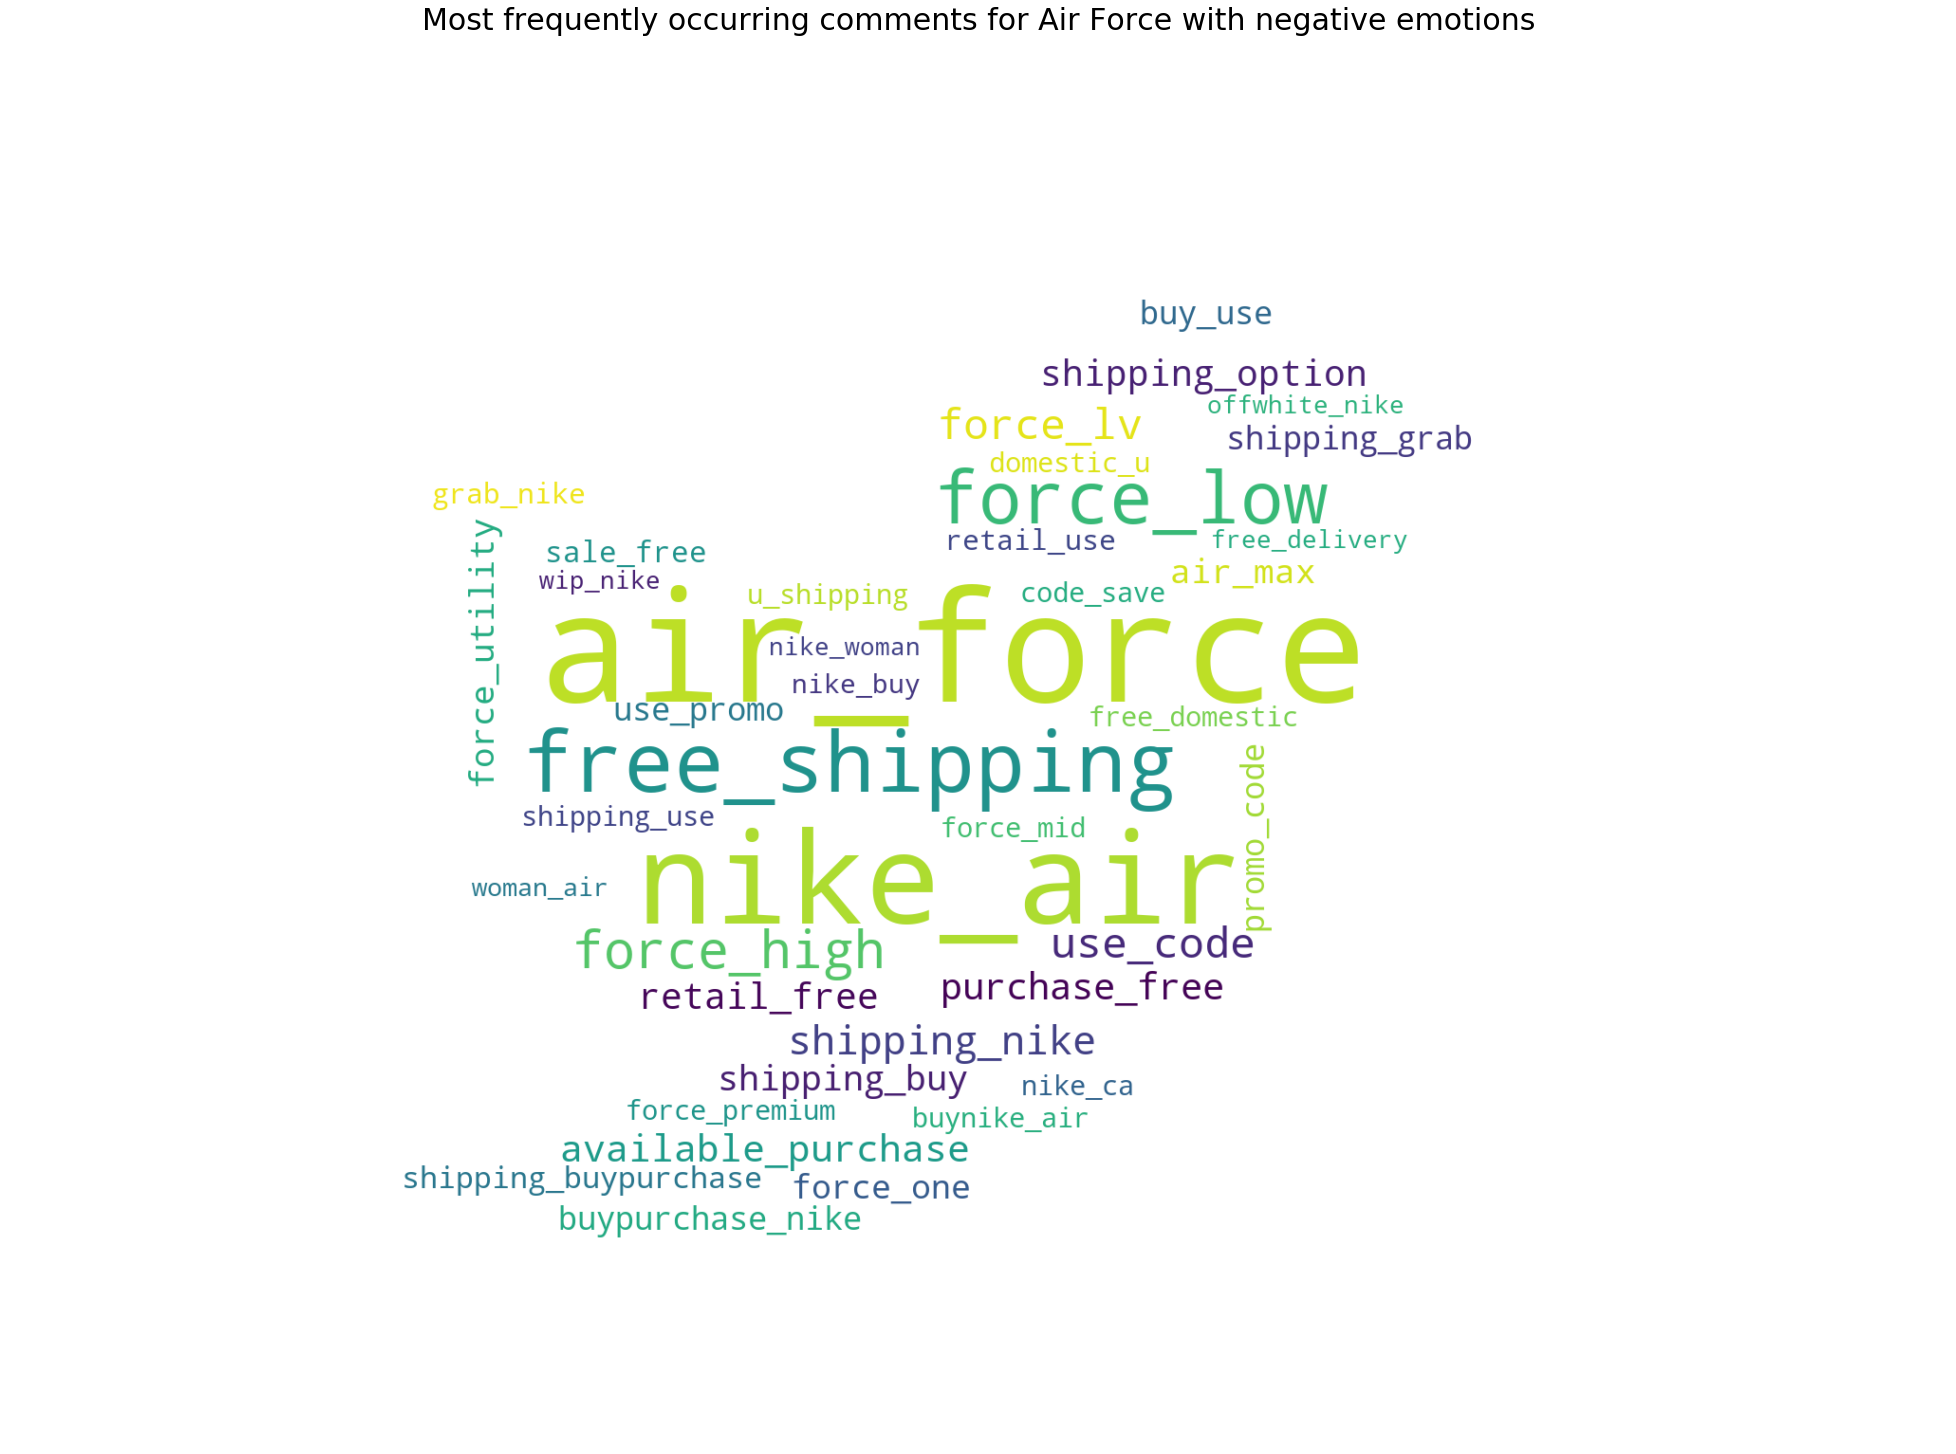

In [133]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from PIL import Image
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
 
from operator import itemgetter
 
WNL = nltk.WordNetLemmatizer()


rawText6 = rawText6.replace("'", "")
 
tokens = nltk.word_tokenize(rawText5)
text = nltk.Text(tokens)
 
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]

text_content = [s for s in text_content if len(s) != 0]
text_content = [WNL.lemmatize(t) for t in text_content]

finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
 
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict6 = {}
 
list_Length = len(scoredList)
for i in range(list_Length):
    word_dict6['_'.join(scoredList[i][0])] = scoredList[i][1]
    
mask = np.array(Image.open('air_jordan.jpg'))
width = 1000,
height = 500,
WC_max_words = 40
background_color = 'white'

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color = background_color,
                     mask=mask)
 
wordCloud.generate_from_frequencies(word_dict6)
plt.figure(figsize=(30,20),facecolor = 'white',edgecolor = 'black')
plt.title('Most frequently occurring comments for Air Force with negative emotions',fontsize= 30)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 
